In [166]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pprint import pprint

## Graph concepts overview

### elements
* graph
* vertex / node
* edge
* path

### edge properties
* direction
* weight
* multiplicity

### node properties
* in-degree
* out-degree
* centrality

nodes can be of different kinds.  
e.g.: In text nets, we have words and documents as nodes.

### graph properties
* directed or undirected
* weighted or unweighted
* cyclic or acyclic
* single or multiple edges
* connected or disconnected

### graph representation
* Vertex and edge collections
* Adjacency list
* Adjacency matrix
* Sparse matrix

## Create graph from data

Load data...

In [167]:
data = pd.read_parquet('yellow_tripdata_2022-08.parquet')
data.shape

(3152677, 19)

That's a lot of data!  
Let's make a subset so we can visualize our graph without it being too clutered.  
We'll pick all rides starting from Taxi Zones 1, 2, 3, and 4.

In [168]:
small_data = (data[['PULocationID','DOLocationID','passenger_count']].
              groupby(['PULocationID','DOLocationID'], as_index=False).
              count().
              query('PULocationID < 10')
              )
small_data.columns = ['origin','destination','rides']
small_data.sample(10, random_state=123)

,origin,destination,rides
346,7,238,12
402,9,173,2
190,5,91,1
239,7,50,2
373,8,145,0
11,1,238,2
297,7,149,1
54,4,1,4
13,1,264,92
15,2,2,1


In [169]:
small_data.shape

(412, 3)

In [170]:
#Creat graph object
G = nx.from_pandas_edgelist(small_data, 'origin', 'destination','rides')

If we wanted to create a directed graph, we could run

```python
G = nx.from_pandas_edgelist(small_data, 'origin', 'destination','rides', create_using=nx.DiGraph)
```

but let's treat this graph as undirected, because the visuals look nicer :)

## Visualize a graph

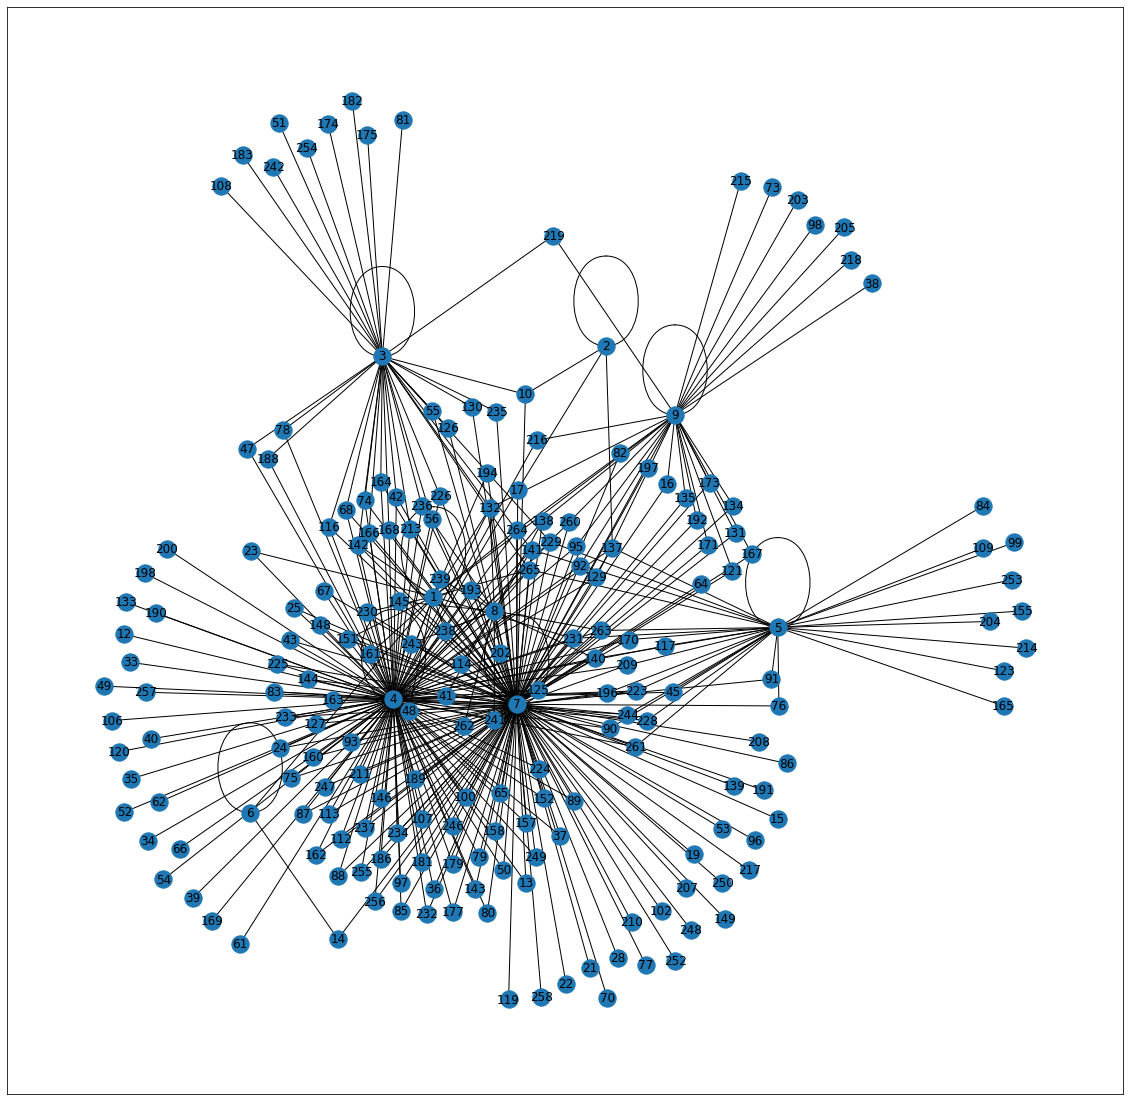

In [171]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G)

__BE CAREFUL : Visual representations of the same graph may look very different.__

> Real world graphs are often very tricky to interpret by looking at them.  
Many of the pretty graphs you'll see in the internet or in textbooks are simply misleading. That's why, in practice, we use network analysis techniques (such as histograms, centrality or community detection algorithms) much more than we use graph visualizations.

Metaphor: a pilot flying a plane at night, guided by instruments, even though he sees nothing outside.

## Exploratory Data Analysis

In [172]:
G.number_of_nodes(), G.number_of_edges()

(207, 409)

In [173]:
#Edges: Who's connected to whom?
G.edges

EdgeView([(1, 1), (1, 6), (1, 23), (1, 48), (1, 132), (1, 142), (1, 151), (1, 161), (1, 194), (1, 230), (1, 231), (1, 238), (1, 239), (1, 264), (1, 265), (1, 4), (1, 7), (1, 9), (6, 6), (6, 14), (23, 4), (48, 4), (48, 7), (132, 3), (132, 4), (132, 7), (132, 8), (132, 9), (142, 3), (142, 4), (142, 7), (151, 4), (151, 7), (161, 4), (161, 7), (194, 7), (230, 4), (230, 7), (231, 4), (231, 5), (231, 7), (238, 4), (238, 7), (238, 8), (239, 4), (239, 7), (239, 8), (264, 4), (264, 7), (264, 9), (265, 3), (265, 4), (265, 5), (265, 7), (265, 8), (2, 2), (2, 10), (2, 17), (2, 137), (10, 3), (10, 7), (17, 4), (17, 7), (137, 4), (137, 5), (137, 7), (3, 3), (3, 42), (3, 47), (3, 51), (3, 55), (3, 56), (3, 68), (3, 74), (3, 78), (3, 81), (3, 108), (3, 116), (3, 126), (3, 130), (3, 141), (3, 164), (3, 166), (3, 168), (3, 174), (3, 175), (3, 182), (3, 183), (3, 188), (3, 213), (3, 219), (3, 226), (3, 229), (3, 235), (3, 236), (3, 242), (3, 254), (42, 4), (42, 7), (47, 4), (55, 7), (56, 4), (56, 7), (68

In [174]:
#Degree of each node
G.degree

DegreeView({1: 19, 6: 4, 23: 2, 48: 3, 132: 6, 142: 4, 151: 3, 161: 3, 194: 2, 230: 3, 231: 4, 238: 4, 239: 4, 264: 4, 265: 6, 2: 5, 10: 3, 17: 3, 137: 4, 3: 36, 42: 3, 47: 2, 51: 1, 55: 2, 56: 3, 68: 3, 74: 3, 78: 2, 81: 1, 108: 1, 116: 3, 126: 2, 130: 2, 141: 5, 164: 3, 166: 3, 168: 3, 174: 1, 175: 1, 182: 1, 183: 1, 188: 2, 213: 3, 219: 2, 226: 3, 229: 4, 235: 2, 236: 4, 242: 1, 254: 1, 4: 132, 7: 151, 12: 1, 13: 2, 24: 2, 25: 2, 33: 1, 34: 1, 35: 1, 36: 2, 37: 2, 39: 1, 40: 1, 41: 3, 43: 2, 45: 2, 49: 1, 50: 2, 52: 1, 54: 1, 61: 1, 62: 1, 65: 2, 66: 1, 67: 2, 75: 2, 79: 2, 80: 2, 83: 2, 85: 2, 87: 2, 88: 2, 89: 2, 90: 3, 92: 3, 93: 2, 95: 3, 97: 2, 100: 2, 106: 1, 107: 2, 112: 2, 113: 2, 114: 3, 117: 2, 120: 1, 125: 2, 127: 2, 129: 3, 133: 1, 138: 4, 140: 4, 143: 2, 144: 2, 145: 3, 146: 2, 148: 2, 152: 2, 157: 2, 158: 2, 160: 2, 162: 2, 163: 2, 169: 1, 170: 3, 177: 2, 179: 2, 181: 2, 186: 2, 189: 2, 190: 1, 193: 3, 196: 3, 198: 1, 200: 1, 202: 3, 209: 3, 211: 2, 216: 2, 223: 3, 224

In [175]:
#Degree of node 1
G.degree[1]

19

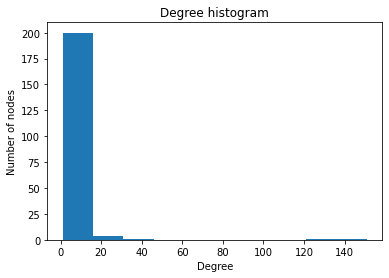

In [176]:
#Degree histogram
degrees = [d for n, d in G.degree]

plt.hist(degrees)
plt.title('Degree histogram')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')

plt.show()

Text(0.5, 0, 'Rank')

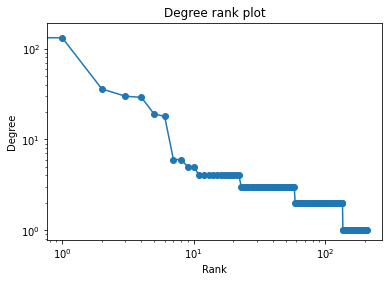

In [177]:
#Node rank
sorted_degrees = sorted([d for n, d in G.degree], reverse=True)

plt.plot(sorted_degrees, marker='o')
plt.loglog()
plt.title('Degree rank plot')
plt.ylabel('Degree')
plt.xlabel('Rank')

__Comments:__
* The degree rank plot is usually plotted in a log-log graph. Why? (continues...)
* One reason is because it makes a power-law distribution appear _assymptotically as a straight line_ with the power coefficient as its slope:

$$
f(x) \sim x^{-\alpha} \implies \ln f(x) \sim -\alpha \ln(x)
$$

* This plot does _not_ look like a straight line assymptotically. Let's show an example of what this would look like:

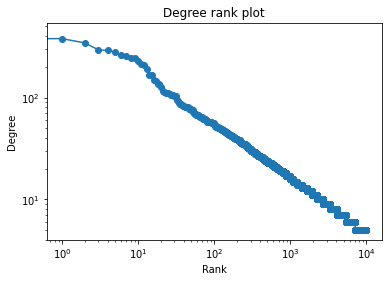

In [178]:
ba = nx.barabasi_albert_graph(10000,5)

#Node rank
sorted_degrees = sorted([d for n, d in ba.degree], reverse=True)

plt.plot(sorted_degrees, marker='o')
plt.loglog()
plt.title('Degree rank plot')
plt.ylabel('Degree')
plt.xlabel('Rank')
plt.show()

How could we estimate the exponent of this power law?  

In [179]:
alpha, loc, scale = stats.powerlaw.fit(sorted_degrees)
alpha, loc, scale

(0.19179331779955178, 4.999999999999999, 464.13080531981245)

Why not use `curve_fit` or fit an OLS directly?  
Because we only observe the straight line pattern _assymptotically_.  
Scipy's `powerlaw.fit` takes this into account, but you'll have to deal with this on your own if you choose to use `curve_fit` or to fit an OLS directly.

## Shortest path

In [180]:
#Shortest path between nodes 1 and 2
nx.dijkstra_path(G, 1, 2)

[1, 4, 17, 2]

In [181]:
#Shortest paths starting from node 1 to all other nodes
cost, path = nx.single_source_dijkstra(G, 1)

In [182]:
path

{1: [1],
 6: [1, 6],
 23: [1, 23],
 48: [1, 48],
 132: [1, 132],
 142: [1, 142],
 151: [1, 151],
 161: [1, 161],
 194: [1, 194],
 230: [1, 230],
 231: [1, 231],
 238: [1, 238],
 239: [1, 239],
 264: [1, 264],
 265: [1, 265],
 4: [1, 4],
 7: [1, 7],
 9: [1, 9],
 14: [1, 6, 14],
 3: [1, 132, 3],
 8: [1, 132, 8],
 5: [1, 231, 5],
 12: [1, 4, 12],
 13: [1, 4, 13],
 17: [1, 4, 17],
 24: [1, 4, 24],
 25: [1, 4, 25],
 33: [1, 4, 33],
 34: [1, 4, 34],
 35: [1, 4, 35],
 36: [1, 4, 36],
 37: [1, 4, 37],
 39: [1, 4, 39],
 40: [1, 4, 40],
 41: [1, 4, 41],
 42: [1, 4, 42],
 43: [1, 4, 43],
 45: [1, 4, 45],
 47: [1, 4, 47],
 49: [1, 4, 49],
 50: [1, 4, 50],
 52: [1, 4, 52],
 54: [1, 4, 54],
 56: [1, 4, 56],
 61: [1, 4, 61],
 62: [1, 4, 62],
 65: [1, 4, 65],
 66: [1, 4, 66],
 67: [1, 4, 67],
 68: [1, 4, 68],
 74: [1, 4, 74],
 75: [1, 4, 75],
 78: [1, 4, 78],
 79: [1, 4, 79],
 80: [1, 4, 80],
 83: [1, 4, 83],
 85: [1, 4, 85],
 87: [1, 4, 87],
 88: [1, 4, 88],
 89: [1, 4, 89],
 90: [1, 4, 90],
 92: [1,

In [183]:
cost  #we could also have called this "distance travelled"

{1: 0,
 6: 1,
 23: 1,
 48: 1,
 132: 1,
 142: 1,
 151: 1,
 161: 1,
 194: 1,
 230: 1,
 231: 1,
 238: 1,
 239: 1,
 264: 1,
 265: 1,
 4: 1,
 7: 1,
 9: 1,
 14: 2,
 3: 2,
 8: 2,
 5: 2,
 12: 2,
 13: 2,
 17: 2,
 24: 2,
 25: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 45: 2,
 47: 2,
 49: 2,
 50: 2,
 52: 2,
 54: 2,
 56: 2,
 61: 2,
 62: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 74: 2,
 75: 2,
 78: 2,
 79: 2,
 80: 2,
 83: 2,
 85: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 92: 2,
 93: 2,
 95: 2,
 97: 2,
 100: 2,
 106: 2,
 107: 2,
 112: 2,
 113: 2,
 114: 2,
 116: 2,
 117: 2,
 120: 2,
 125: 2,
 127: 2,
 129: 2,
 133: 2,
 137: 2,
 138: 2,
 140: 2,
 141: 2,
 143: 2,
 144: 2,
 145: 2,
 146: 2,
 148: 2,
 152: 2,
 157: 2,
 158: 2,
 160: 2,
 162: 2,
 163: 2,
 164: 2,
 166: 2,
 168: 2,
 169: 2,
 170: 2,
 177: 2,
 179: 2,
 181: 2,
 186: 2,
 188: 2,
 189: 2,
 190: 2,
 193: 2,
 196: 2,
 198: 2,
 200: 2,
 202: 2,
 209: 2,
 211: 2,
 213: 2,
 216: 2,
 223: 2,
 224: 2,
 225: 2,
 226: 2,


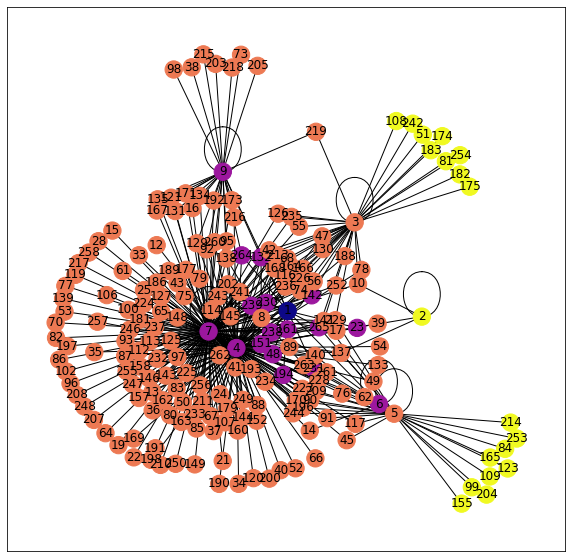

In [184]:
#Color nodes by distance from node 1
plt.figure(figsize=(10,10))
values = cost
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=n_color,cmap='plasma')

#The origin appears in dark blue

You can also get the shortest paths between all pairs of nodes using

```python
nx.all_pairs_dijkstra_path(G)
```

## Centrality

### Closeness centrality
The __closeness centrality__ of a node `u` is the reciprocal of the average shortest path distance to `u` over all reachable nodes.


$$
\text{Closeness centrality of node }u = \frac{1}{\text{Average of shortest paths from } u \text{ to all other (reachable) nodes}}
$$

In [185]:
closeness_centrality = nx.closeness_centrality(G)

#Sort
sorted(closeness_centrality.items(), key = lambda x: x[1], reverse=True)[:5]

[(7, 0.7330960854092526),
 (4, 0.6688311688311688),
 (1, 0.4975845410628019),
 (265, 0.4975845410628019),
 (141, 0.4951923076923077)]

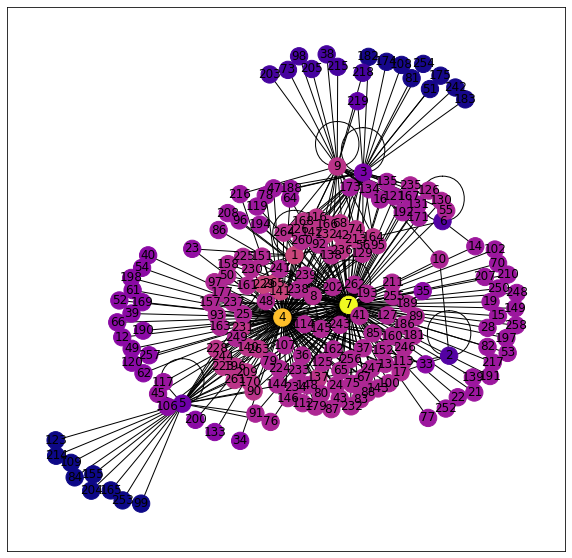

In [186]:
plt.figure(figsize=(10,10))
values = closeness_centrality
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, node_color=n_color,cmap='plasma')

### Betweenness centrality
The __betweenness centrality__ of a node `u` is the fraction of shortest paths between any two other nodes that pass through `u`

In [187]:
betweenness_centraliry = nx.betweenness_centrality(G)

#Sort
sorted(betweenness_centraliry.items(), key = lambda x: x[1], reverse=True)[:5]

[(7, 0.5759708056838161),
 (4, 0.39515637185490826),
 (3, 0.09543678430547146),
 (5, 0.08977499236125315),
 (9, 0.07884206794925779)]

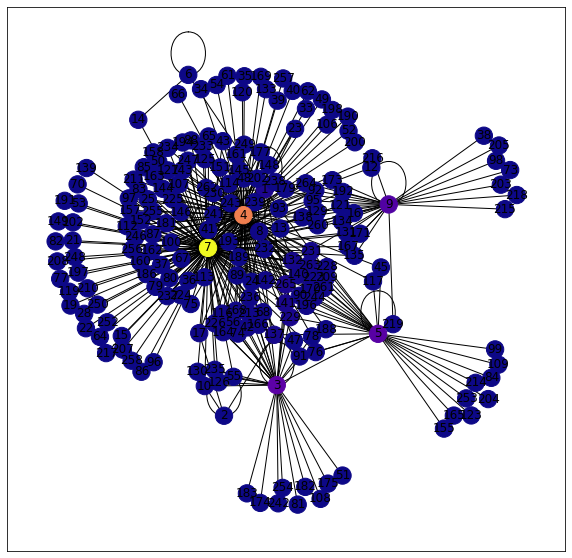

In [188]:
plt.figure(figsize=(10,10))
values = betweenness_centraliry
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, node_color=n_color,cmap='plasma')

## Comunity detection
For a paper comparing different algorithms, see this [reference](https://www.nature.com/articles/srep30750)

### Clustering coefficient

One way to think about community dectection is that we're _counting triangles_.   
In a community, members are highly connected, which means we have many triangles formed by them.  
They are also less connected to members outside their communities, which means we have fewer triangles formed both by members inside and outside the community.  

![community-picture](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs40537-019-0243-y/MediaObjects/40537_2019_243_Fig1_HTML.png?as=webp)

The _clustering coefficient_ of a node is the fraction of possible triangles through that node that exist.  
(Things get slightly more complicated for weighted or directional graphs, but lets keep things intuitive here)  

If we represent the degree of $u$ by $d(u)$, then there are $d(u) \choose 2$ possible triangles that contain $u$.  
Let $T(u)$ be the number of triangles that actually exist in the network containing $u$.  
The clustering coefficient is

$$
CC(u) = \frac{T(u)}{ d(u) \choose 2}
$$

In [189]:
clustering_coefficients = nx.clustering(G)

#Show the first few
list(clustering_coefficients.items())[:5]

[(1, 0.20588235294117646), (6, 0), (23, 1.0), (48, 1.0), (132, 0.4)]

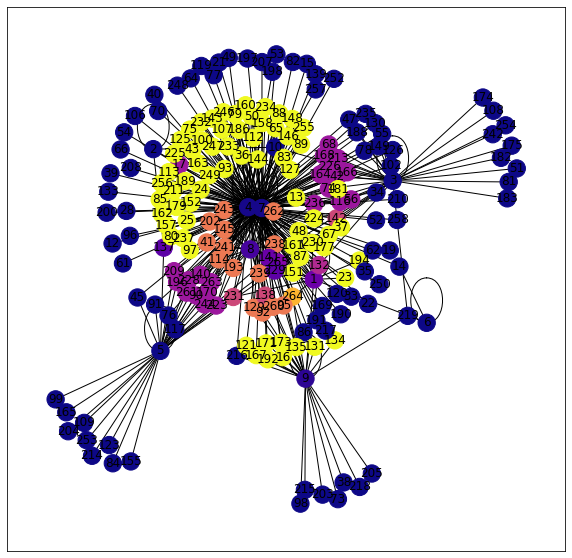

In [190]:
plt.figure(figsize=(10,10))
values = clustering_coefficients
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, node_color=n_color,cmap='plasma')

The clustering coefficient doesn't tell us which community does a node belong to.  
There are many algorithms to do this, so let's take a look at the most popular ones...

### Label propagation

The algorithm proceeds as follows. After initializing each node with a unique label, __the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors__. The algorithm halts when each node has the label that appears most frequently among its neighbors.

In [191]:
communities = nx.community.label_propagation_communities(G)

In [192]:
#Create dataframe with the community of each node

node_communnity = pd.DataFrame([], index=list(G.nodes), columns=['community'])
node_communnity.head()

for node in G.nodes:
    for i, community in enumerate(communities):
        if node in community:
            node_communnity.loc[node,:] = i

node_communnity.sample(5)

,community
10,0
256,0
102,0
198,0
80,0


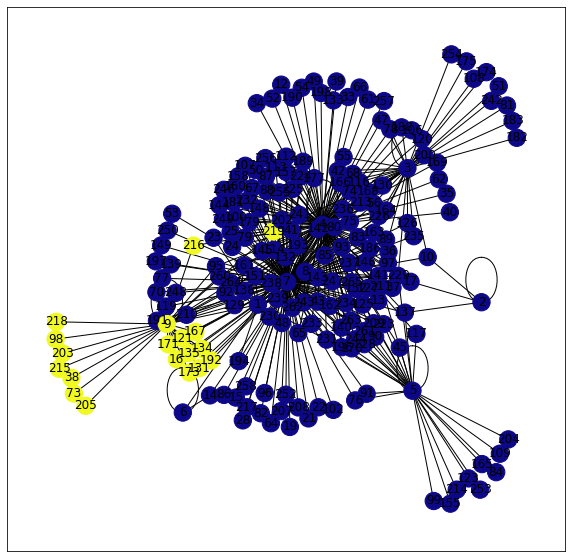

In [193]:
#Visualize
plt.figure(figsize=(10,10))
values = node_communnity.community
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=n_color,cmap='plasma')

### Clauset-Newman-Moore greedy modularity maximization

Modularity is the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random.  

The CNM algorithms begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists or until number of communities `n_communities` is reached.

In [194]:
communities = nx.algorithms.community.greedy_modularity_communities(G)

In [195]:
#Create dataframe with the community of each node

node_communnity = pd.DataFrame([], index=list(G.nodes), columns=['community'])
node_communnity.head()

for node in G.nodes:
    for i, community in enumerate(communities):
        if node in community:
            node_communnity.loc[node,:] = i

node_communnity.sample(5)

,community
155,3
231,5
226,2
49,0
255,1


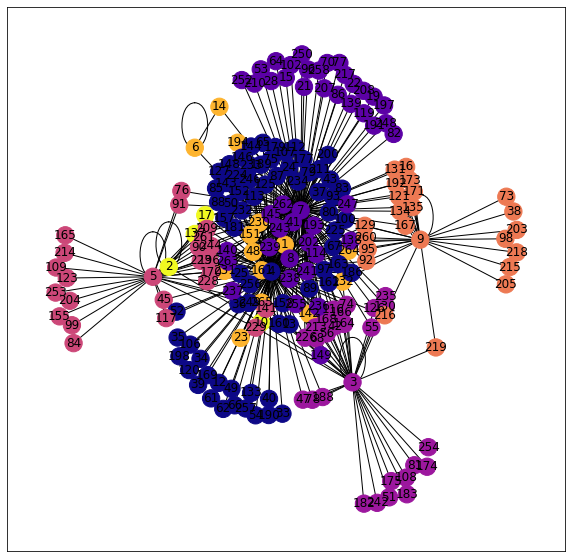

In [196]:
#Visualize
plt.figure(figsize=(10,10))
values = node_communnity.community
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=n_color,cmap='plasma')

### Louvain algorithm

From Neo4j's [documentation](https://neo4j.com/developer/graph-data-science/community-detection-graph-algorithms/#:~:text=Beginner-,What%20are%20community%20detection%20algorithms%3F,supports%20many%20different%20centrality%20algorithms.): 

> The Louvain method for community detection is __an algorithm for detecting communities in networks__. It maximizes a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities. This means that __the algorithm evaluates how much more densely connected the nodes within a community are, compared to how connected they would be in a random network__. On each iteration the Louvain algorithm recursively merges communities into a single node and executes the modularity clustering on the condensed graphs. It has the following use cases:


In [197]:
communities = nx.algorithms.community.louvain_communities(G)

for i, community in enumerate(communities):
    print('community ', i, ':', community)

community  0 : {1, 194, 132, 6, 264, 265, 14, 142, 23, 151, 161, 230, 231, 238, 239, 48}
community  1 : {137, 17, 2, 10}
community  2 : {130, 3, 68, 74, 78, 81, 213, 183, 226, 164, 166, 168, 42, 235, 108, 174, 47, 175, 242, 51, 116, 182, 55, 56, 126, 188, 254}
community  3 : {256, 257, 4, 133, 12, 13, 143, 144, 152, 25, 157, 158, 33, 34, 163, 36, 35, 39, 40, 169, 43, 49, 177, 179, 50, 52, 54, 181, 189, 61, 62, 190, 65, 66, 67, 198, 200, 75, 80, 85, 87, 88, 93, 224, 100, 234, 106, 237, 112, 120, 249, 125, 255}
community  4 : {258, 7, 139, 15, 146, 19, 148, 21, 22, 149, 24, 28, 160, 162, 37, 53, 186, 191, 64, 197, 70, 77, 207, 208, 79, 82, 211, 210, 83, 86, 89, 217, 247, 96, 225, 97, 102, 232, 233, 107, 113, 246, 119, 248, 250, 252, 127}
community  5 : {193, 262, 263, 8, 41, 138, 202, 140, 236, 141, 145, 241, 114, 243}
community  6 : {196, 5, 261, 204, 76, 209, 84, 214, 90, 91, 155, 223, 99, 228, 165, 229, 170, 45, 109, 244, 117, 123, 253}
community  7 : {192, 129, 131, 260, 134, 135, 73

In [198]:
#Create dataframe with the community of each node

node_communnity = pd.DataFrame([], index=list(G.nodes), columns=['community'])
node_communnity.head()

for node in G.nodes:
    for i, community in enumerate(communities):
        if node in community:
            node_communnity.loc[node,:] = i

node_communnity.sample(5)

,community
95,7
236,5
200,3
107,4
126,2


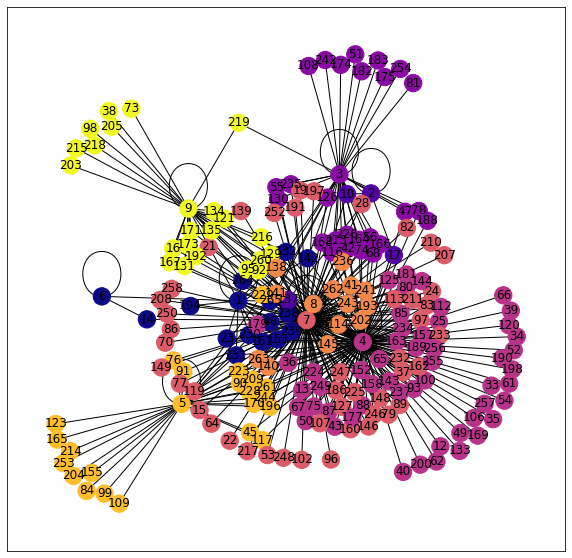

In [199]:
#Visualize
plt.figure(figsize=(10,10))
values = node_communnity.community
n_color = np.asarray([values[n] for n in G.nodes()])
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=n_color,cmap='plasma')

## Mathematical representations
These matrices underpin everything we've seen so far.  
In addition, they can serve as features for a ML model.

### Adjacency matrix

In [200]:
A = nx.adjacency_matrix(G)
A

C:\Users\felbu\AppData\Local\Temp\ipykernel_18932\3373060980.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


<207x207 sparse matrix of type '<class 'numpy.intc'>'
	with 810 stored elements in Compressed Sparse Row format>

In [201]:
A.todense()

matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### Laplacian Matrix
1. Get the Adjacency matrix...
2. Change it's sign...
3. Substitute the main diagonal by the degee of each node

In [202]:
L = nx.laplacian_matrix(G)
L

<class 'networkx.utils.decorators.argmap'> compilation 60:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


<207x207 sparse matrix of type '<class 'numpy.intc'>'
	with 1009 stored elements in Compressed Sparse Row format>

In [203]:
L.todense()

matrix([[17, -1, -1, ...,  0,  0,  0],
        [-1,  2,  0, ...,  0,  0,  0],
        [-1,  0,  2, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  0, ...,  0,  0,  1]], dtype=int32)

## Some comments on ML & DL with graphs

* In Graph Machine Learning (GML) and Graph Deep Learning (GDL) we often want to predict some characteristic of a node or an edge.
* Network theory gives insights to good features that can be used when building ML models
* We can use not only features from the nodes themselves, but also from their neighbors. Arguably, the characteristics of a node can be predicted by the characteristics of the other nodes to which it is connected. Since much of network theory evolved from epidemiology, we call this _contagion_. 

To find the neighbors from node 1, for example, we can run...

In [204]:
list(nx.neighbors(G, 1))

[1, 6, 23, 48, 132, 142, 151, 161, 194, 230, 231, 238, 239, 264, 265, 4, 7, 9]

Then, we can get their properties and use them as features for node 1.
* The adjacency or laplacian matrix can also be used as input for ML models on graph data

* __Graph Neural Networks__ are neural networks designed to work with graph data. They input a graph and make predictions about properties of their nodes and edges.  

__Brain teaser:__ Graph Neural Networks have been widely used in computer vision, a field previously dominated by Convolutional Neural Networks (CNNs). Why is it that Graph Neural Networks perform well in computer vision tasks? Is this characteristic also present in Convolutional Neural Networks? How?

## Special kinds of graphs
Graphs in the real world often exhibit similar patterns despite emerging in completely different contexts.  
There are solid mathematical reasons why this happens.  
Let's look at some of the most common kinds of graphs.

* Erdös-Rényi
* Bárabasi-Albert
* Watts–Strogatz

Before discussing each of them, let's just look at them:

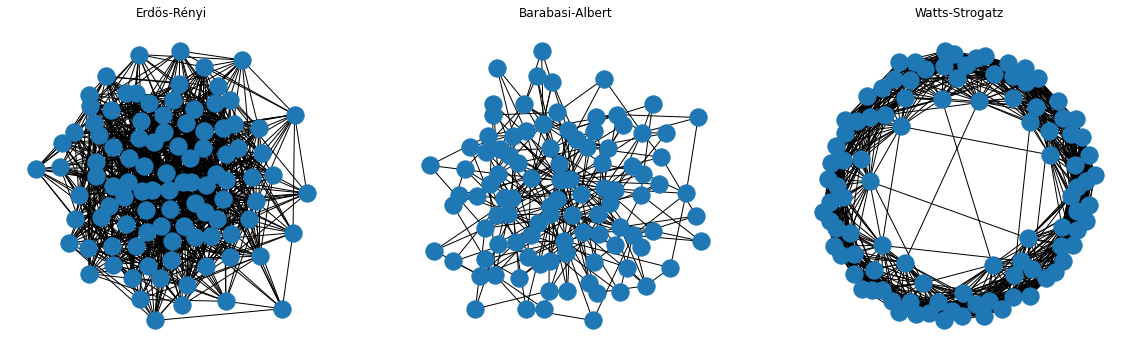

In [205]:
plt.figure(figsize=(20,6))

#plot 1:
plt.subplot(1, 3, 1)
plt.title('Erdös-Rényi')
er = nx.erdos_renyi_graph(100, 0.2, seed=123)
nx.draw(er)

#plot 2:
plt.subplot(1, 3, 2)
plt.title('Barabasi-Albert')
ba = nx.barabasi_albert_graph(100, 3, seed=123)
nx.draw(ba)

#plot 3:
plt.subplot(1, 3, 3)
plt.title('Watts-Strogatz')
ws = nx.connected_watts_strogatz_graph(100, 25, 0.01, seed=123)
nx.draw(ws)

plt.show()


Let's make bigger networks so we can investigate statistical properties:

In [206]:
N = 1000
er = nx.erdos_renyi_graph(N, 0.2, seed=123)
ba = nx.barabasi_albert_graph(N, 3, seed=123)
ws = nx.connected_watts_strogatz_graph(N, 25, 0.01, seed=123)

### Erdös-Rényi
(a.k.a. random graph)

* Edges form at random with constant probability $p$.
* As a result, the number of edges per node follows a Poisson distribution

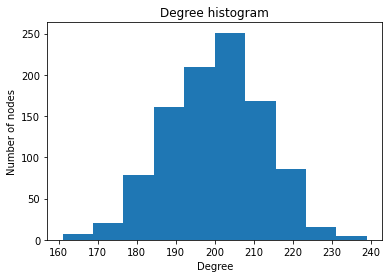

In [207]:
#Degree histogram
degrees = [d for n, d in er.degree]

plt.hist(degrees)
plt.title('Degree histogram')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')

plt.show()

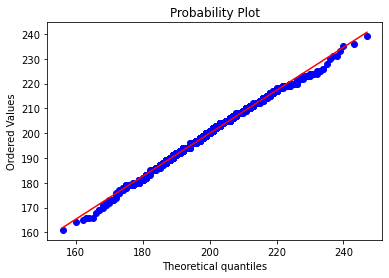

In [208]:
_, _ = stats.probplot(degrees, dist=stats.poisson(mu=N*p_er), plot=plt)

Compare with other graph types and see how well they follow a Poisson distribution:

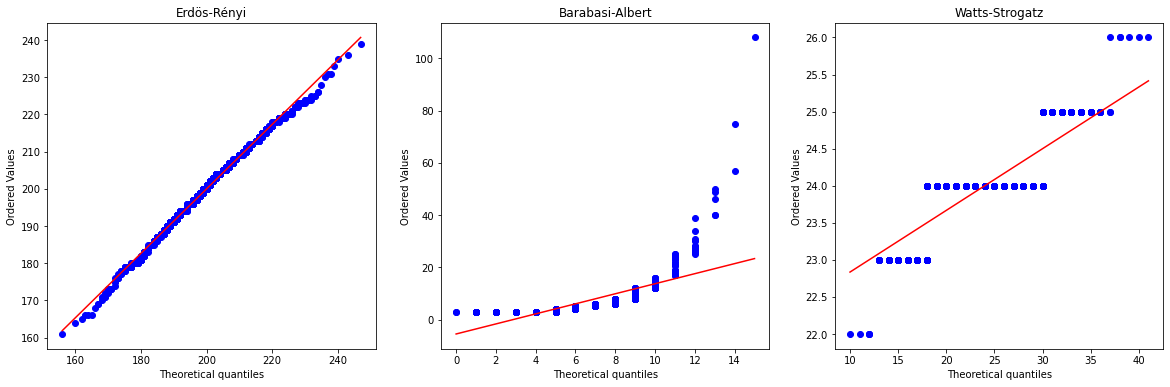

In [209]:
def plot_qq(graph):
    degrees = [d for n, d in graph.degree]
    _, _ = stats.probplot(degrees, dist=stats.poisson(mu=np.mean(degrees)), plot=plt)
    pass


plt.figure(figsize=(20,6))

#plot 1:
plt.subplot(1, 3, 1)
plot_qq(er)
plt.title('Erdös-Rényi')

#plot 2:
plt.subplot(1, 3, 2)
plot_qq(ba)
plt.title('Barabasi-Albert')

#plot 3:
plt.subplot(1, 3, 3)
plot_qq(ws)
plt.title('Watts-Strogatz')

plt.show()


### Barabási-Albert

* Edges are formed by _preferential attachment_
* Preferential attachment is very, very common. 

Here are [80 examples](https://www.frontiersin.org/articles/10.3389/fphy.2018.00020/full) of things following a preferential attachment mechanism.

![80-power-law-examples](https://www.researchgate.net/profile/Pierpaolo-Andriani/publication/228657801/figure/tbl1/AS:667854680641538@1536240372134/Some-Examples-of-Natural-and-Social-Power-Law-Phenomena.png)

* As a result of preferential attachment, the number of edges per node (assymptotically) follows a __power law__.

$$
f(x) \sim x^{-\alpha}
$$

for $x > x_{min}$

* A power law can be identified by a straight line in the log-log degree x rank plot. 



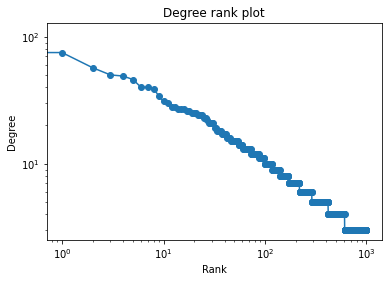

In [210]:
def plot_degrank(graph):
    sorted_degrees = sorted([d for n, d in graph.degree], reverse=True)
    plt.plot(sorted_degrees, marker='o')
    plt.loglog()
    plt.title('Degree rank plot')
    plt.ylabel('Degree')
    plt.xlabel('Rank')


plot_degrank(ba)
plt.show()

In [211]:
alpha, loc, scale = stats.powerlaw.fit(sorted_degrees)
alpha

0.19179331779955178

Again, compare with other graph types:

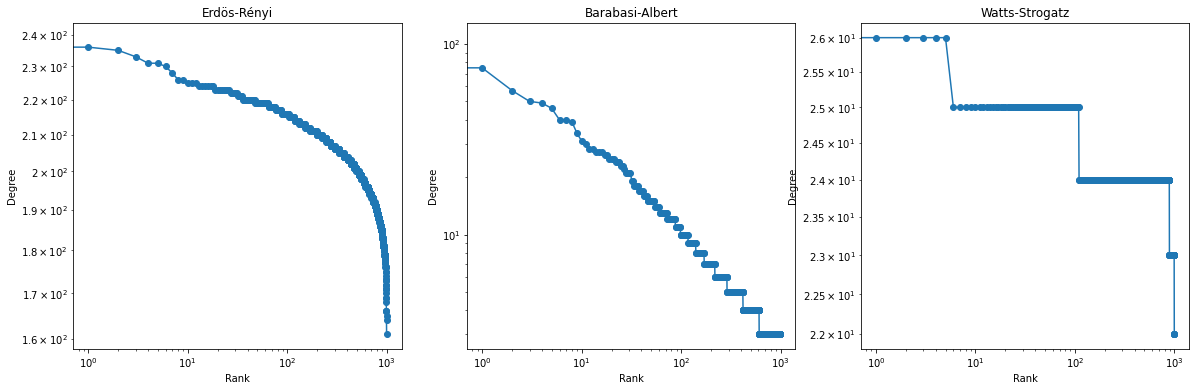

In [212]:
plt.figure(figsize=(20,6))

#plot 1:
plt.subplot(1, 3, 1)
plot_degrank(er)
plt.title('Erdös-Rényi')

#plot 2:
plt.subplot(1, 3, 2)
plot_degrank(ba)
plt.title('Barabasi-Albert')

#plot 3:
plt.subplot(1, 3, 3)
plot_degrank(ws)
plt.title('Watts-Strogatz')

plt.show()


* If you want to learn more about power laws and preferential attachment, check this awesome-paper that #changedmylife:
> Andriani, Pierpaolo & Mckelvey, Bill. (2005). Beyond Gaussian averages: redirecting organization science toward extreme events and power laws.

### Watts-Strogatz
* Stanley Milgram's Small-World experiment
* Six degrees of separation
* Watts and Strogatz theorized two reasons for the small world phenomenon: 
    * Existence of local clustering and triadic closures. 
    * Existence of hubs 
* The WS model modifies to ER model to include these characteristics and give rise to a small-world graph
* It is an intermediate case between a ring and an ER network